# Challenge
This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings 
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]
from scipy import stats

In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [8]:
test.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


In [9]:
train.shape,test.shape

((35000, 20), (15000, 19))

In [10]:
# combine
combined=pd.concat([train,test],ignore_index=True)
combined.shape

(50000, 20)

In [11]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            50000 non-null  float64
 1   rate_code                50000 non-null  int64  
 2   store_and_fwd_flag       50000 non-null  object 
 3   payment_type             50000 non-null  int64  
 4   fare_amount              50000 non-null  float64
 5   extra                    50000 non-null  float64
 6   mta_tax                  50000 non-null  float64
 7   tip_amount               50000 non-null  float64
 8   tolls_amount             50000 non-null  float64
 9   imp_surcharge            50000 non-null  float64
 10  total_amount             50000 non-null  float64
 11  pickup_location_id       50000 non-null  int64  
 12  dropoff_location_id      50000 non-null  int64  
 13  year                     50000 non-null  int64  
 14  month                 

## Univariate analysis

In [12]:
# Numeric columns
num_cols=combined.select_dtypes(include=np.number).columns
num_cols

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [13]:
print(combined.rate_code.unique())
print(combined.payment_type.unique())
print(combined.imp_surcharge.unique())
print(combined.mta_tax.unique())

[1 3 5 4 2]
[1 2 3 4]
[0.3 0. ]
[0.5 0. ]


In [14]:
# coverting the above to object
combined[['rate_code','payment_type','imp_surcharge','mta_tax']]=combined[['rate_code','payment_type','imp_surcharge','mta_tax']].astype('object')

In [15]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            50000 non-null  float64
 1   rate_code                50000 non-null  object 
 2   store_and_fwd_flag       50000 non-null  object 
 3   payment_type             50000 non-null  object 
 4   fare_amount              50000 non-null  float64
 5   extra                    50000 non-null  float64
 6   mta_tax                  50000 non-null  object 
 7   tip_amount               50000 non-null  float64
 8   tolls_amount             50000 non-null  float64
 9   imp_surcharge            50000 non-null  object 
 10  total_amount             50000 non-null  float64
 11  pickup_location_id       50000 non-null  int64  
 12  dropoff_location_id      50000 non-null  int64  
 13  year                     50000 non-null  int64  
 14  month                 

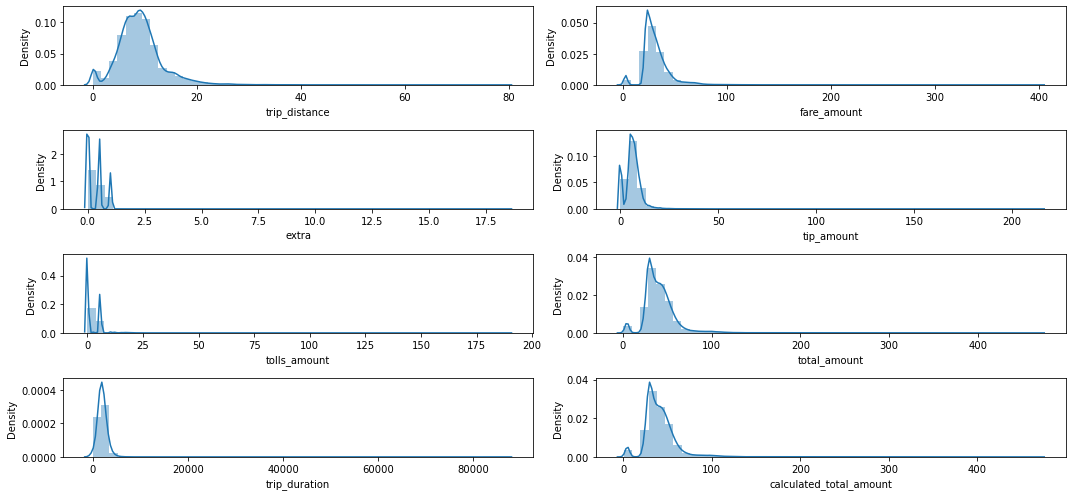

In [16]:
# Numerical variables
num_cols=['trip_distance', 'fare_amount', 'extra',
        'tip_amount', 'tolls_amount',
       'total_amount','trip_duration',
       'calculated_total_amount']
it=1
for i in num_cols:
    plt.subplot(4,2,it)
    sns.distplot(combined[i])
    it+=1
plt.tight_layout()
plt.show()

# All the numeric variables are Positively Skewed

In [17]:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,50000.0,9.093300,4.491785,0.01,6.49,8.71,10.9725,79.01
fare_amount,50000.0,31.896397,14.632630,0.01,24.00,29.00,36.0000,400.00
extra,50000.0,0.320838,0.407761,0.00,0.00,0.00,0.5000,18.50
tip_amount,50000.0,6.144731,4.436417,0.00,4.46,6.05,8.0800,215.00
tolls_amount,50000.0,2.259124,3.537413,0.00,0.00,0.00,5.7600,189.50
total_amount,50000.0,41.417478,19.232173,0.31,30.35,38.47,48.3000,468.35
pickup_location_id,50000.0,152.452500,59.714370,1.00,132.00,138.00,186.0000,265.00
dropoff_location_id,50000.0,146.482140,76.368319,1.00,87.00,141.00,228.0000,265.00
year,50000.0,2018.000000,0.000000,2018.00,2018.00,2018.00,2018.0000,2018.00
month,50000.0,6.129920,3.336690,1.00,3.00,6.00,9.0000,12.00


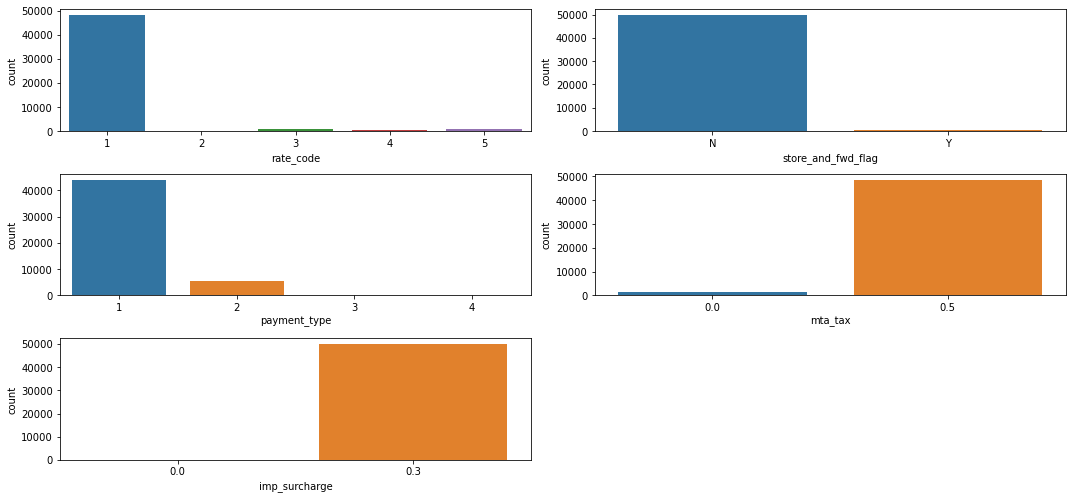

In [18]:
# Categorical variable
cat_cols=combined.select_dtypes(exclude=np.number)
it=1
for i in cat_cols:
    plt.subplot(3,2,it)
    sns.countplot(combined[i])
    it+=1
plt.tight_layout()
plt.show()

## Bivariate anlaysis

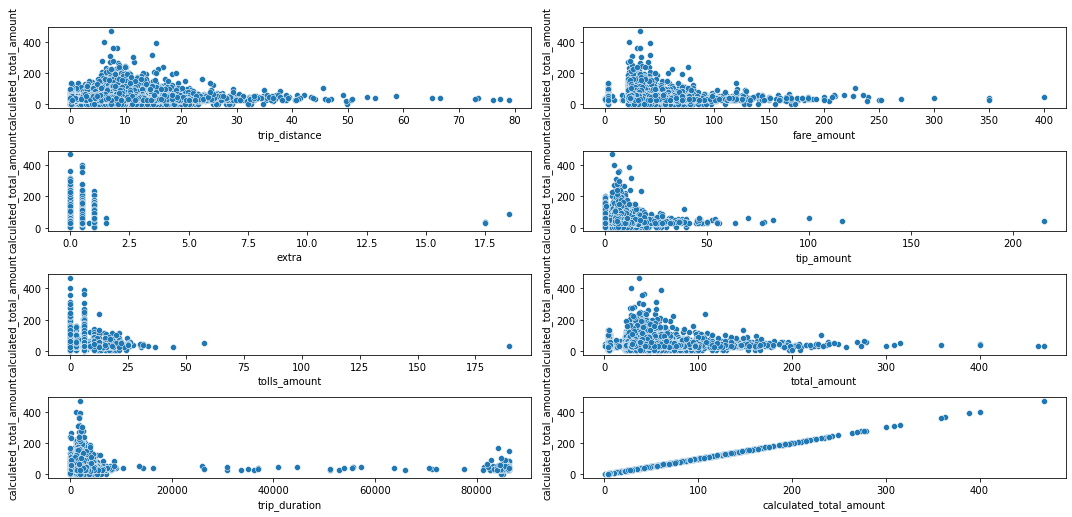

In [19]:
# Num vs num
it=1
for i in num_cols:
    plt.subplot(4,2,it)
    sns.scatterplot(combined[i],combined.calculated_total_amount)
    it+=1
plt.tight_layout()
plt.show()

# NO variable is correlated with target

## Check for outliers

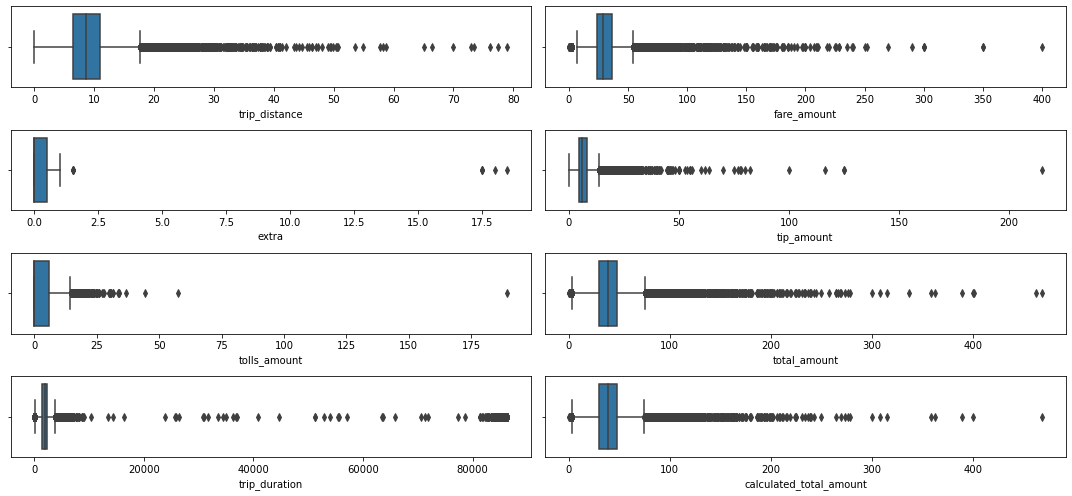

In [20]:
# Outliers(minmax or robers scaler(quantile based) are preferred)
it=1
for i in num_cols:
    plt.subplot(4,2,it)
    sns.boxplot(combined[i])
    it+=1
plt.tight_layout()
plt.show()

# Huge Outliers

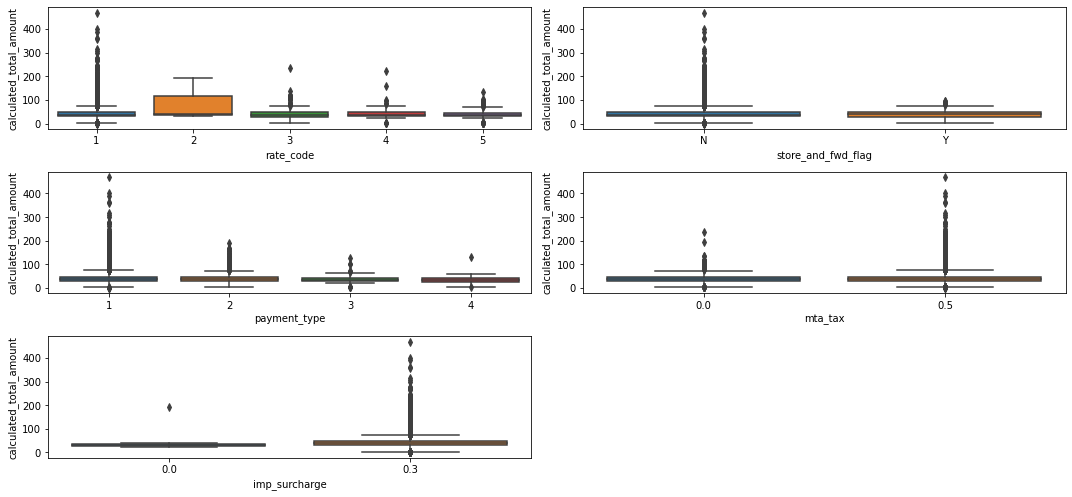

In [21]:
# Num vs cat
it=1
for i in cat_cols:
    plt.subplot(3,2,it)
    sns.boxplot(combined[i],combined.calculated_total_amount)
    it+=1
plt.tight_layout()
plt.show()

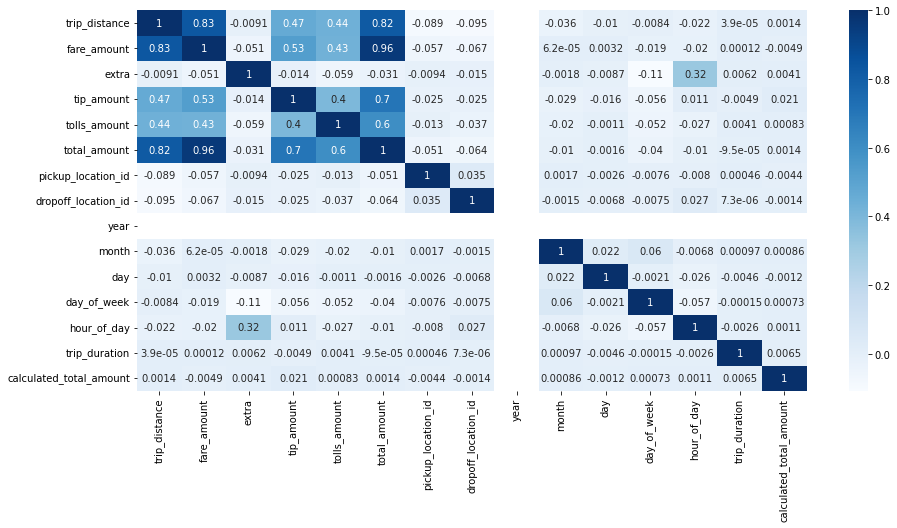

In [22]:
sns.heatmap(combined.corr(),annot=True,cmap='Blues')
plt.show()

## Missing values


In [23]:
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

## Feature enginnering

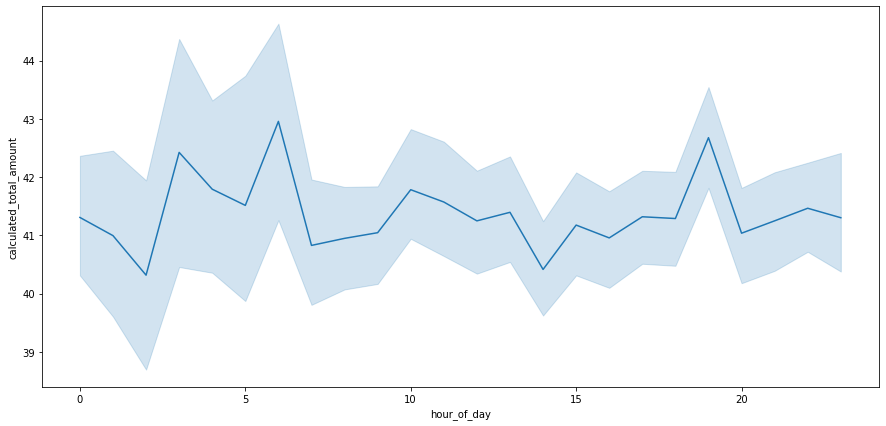

In [24]:
# hour_of_day
sns.lineplot(combined.hour_of_day,combined.calculated_total_amount)
plt.show()

In [25]:
# Rush hours..

combined['Rush_hour']=combined.hour_of_day.apply(lambda x :1 if x in [6,10,15,16,17,18,19,20] else 0)

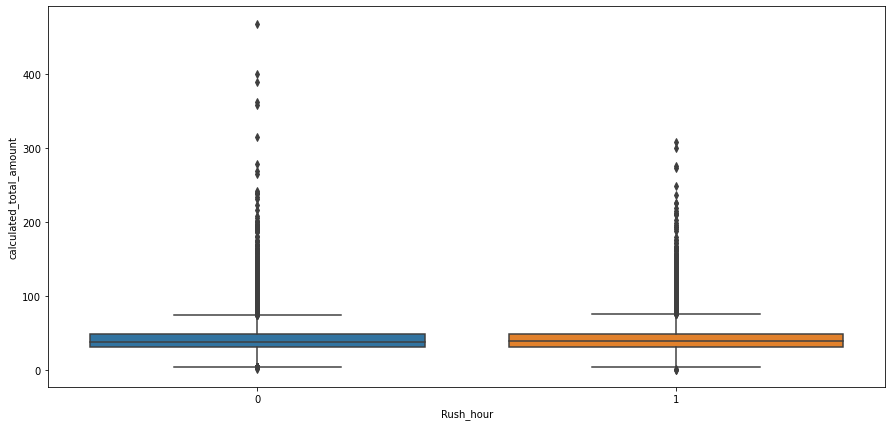

In [26]:
sns.boxplot(x='Rush_hour',y='calculated_total_amount',data=combined)
plt.show()

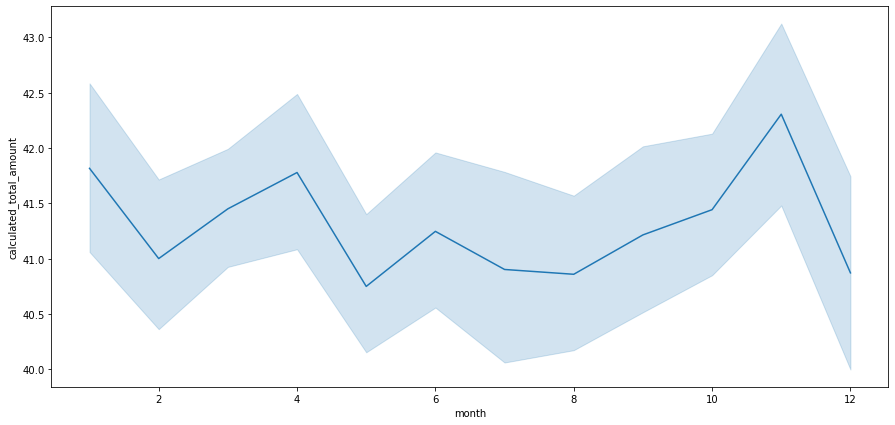

In [27]:
sns.lineplot(combined.month,combined.calculated_total_amount)
plt.show()

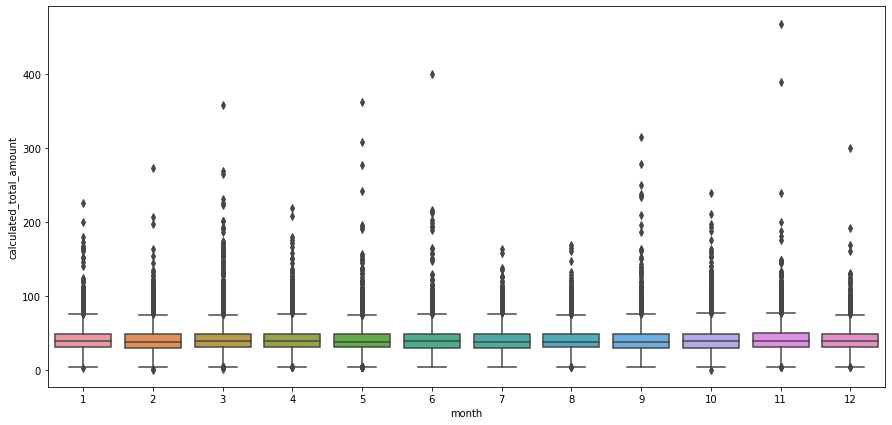

In [28]:
sns.boxplot(combined.month,combined.calculated_total_amount)
plt.show()

In [29]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans=KMeans()
visualizer=KElbowVisualizer(estimator=kmeans)

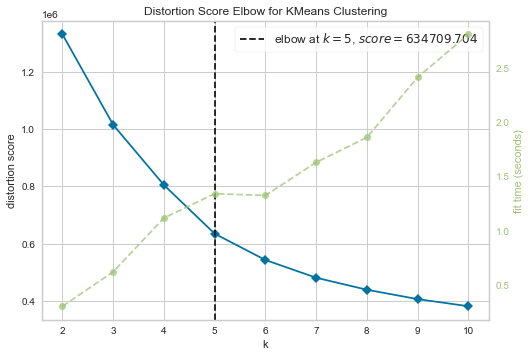

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
data=combined.loc[:,['day_of_week','hour_of_day','month']]
visualizer.fit(data)
visualizer.show()

In [31]:
# n_cluster=5
kmeans=KMeans(n_clusters=5,random_state=0)
k=kmeans.fit(data)
combined['clusters']=k.labels_

In [32]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush_hour,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,...,138,2018,3,7,2,6,2131.0,24.30,1,4
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,...,236,2018,2,25,6,10,2377.0,37.40,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,...,230,2018,1,29,0,8,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,...,138,2018,9,25,1,20,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,...,87,2018,8,20,0,21,1575.0,23.80,0,3


## Split the data

In [33]:
train.shape,test.shape

((35000, 20), (15000, 19))

In [34]:
newtrain=combined.loc[0:train.shape[0]-1,:]
newtest=combined.loc[train.shape[0]:,:]

In [35]:
# drop the target from newtest
newtest.drop('calculated_total_amount',axis=1,inplace=True)

In [36]:
newtrain.shape,newtest.shape

((35000, 22), (15000, 21))

In [37]:
## Outliers Removal
Q1=newtrain.quantile(0.25)
Q3=newtrain.quantile(0.75)
IQR=Q3-Q1

UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

wt_outliers=newtrain.loc[~((newtrain<LL)|(newtrain>UL)).any(axis=1)]
wt_outliers.shape

(26105, 22)

## Scaling 

In [38]:
wt_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26105 entries, 0 to 34997
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            26105 non-null  float64
 1   rate_code                26105 non-null  object 
 2   store_and_fwd_flag       26105 non-null  object 
 3   payment_type             26105 non-null  object 
 4   fare_amount              26105 non-null  float64
 5   extra                    26105 non-null  float64
 6   mta_tax                  26105 non-null  object 
 7   tip_amount               26105 non-null  float64
 8   tolls_amount             26105 non-null  float64
 9   imp_surcharge            26105 non-null  object 
 10  total_amount             26105 non-null  float64
 11  pickup_location_id       26105 non-null  int64  
 12  dropoff_location_id      26105 non-null  int64  
 13  year                     26105 non-null  int64  
 14  month                 

In [39]:
# Drop insignificant variables
finaltrain=wt_outliers.drop(['calculated_total_amount','year','pickup_location_id','dropoff_location_id'],axis=1)

finaltest=newtest.drop(['year','pickup_location_id','dropoff_location_id'],axis=1)

In [40]:
finaltrain.shape,finaltest.shape

((26105, 18), (15000, 18))

In [41]:
num_cols=finaltrain.select_dtypes(include=np.number).columns
num_cols

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'Rush_hour', 'clusters'],
      dtype='object')

In [42]:
# num_cols=['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
#        'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
#        'trip_duration']

# from sklearn.preprocessing import MinMaxScaler
# mm=MinMaxScaler()
# for i in num_cols:
#     finaltrain[i]=mm.fit_transform(finaltrain[[i]])
#     finaltest[i]=mm.transform(finaltest[[i]])    

In [43]:
# finaltest.head()

In [44]:
num_cols=['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration']

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
for i in num_cols:
    finaltrain.loc[:,i]=mm.fit_transform(pd.DataFrame(finaltrain.loc[:,i]))
    finaltest.loc[:,i]=mm.transform(pd.DataFrame(finaltest.loc[:,i]))

In [45]:
finaltest.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,Rush_hour,clusters
35000,0.883878,1,N,2,0.809725,0.0,0.5,0.000000,0.000000,0.3,0.558626,0.818182,0.633333,0.833333,0.695652,1.081301,1,3
35001,0.410372,1,N,1,0.397463,0.0,0.5,0.583580,0.000000,0.3,0.385213,0.090909,0.766667,0.833333,0.652174,0.387160,1,0
35002,0.837091,1,N,1,0.714588,0.5,0.5,0.618343,0.000000,0.3,0.623749,0.727273,0.333333,0.166667,0.956522,0.360247,0,3
35003,0.162345,1,N,2,0.323467,0.0,0.5,0.000000,0.000000,0.3,0.215086,0.454545,0.200000,0.500000,0.478261,0.457527,0,4
35004,0.503946,1,N,1,0.534884,0.0,0.5,0.000000,0.403927,0.3,0.450485,0.272727,0.633333,0.666667,0.434783,0.424166,1,4


## Encoding

In [46]:
dummytrain=pd.get_dummies(finaltrain,drop_first=True)
dummytest=pd.get_dummies(finaltest,drop_first=True)

In [47]:
dummytrain.shape,dummytest.shape

((26105, 22), (15000, 23))

In [48]:
dummytrain

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,month,day,day_of_week,hour_of_day,...,clusters,rate_code_3,rate_code_4,rate_code_5,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,mta_tax_0.5,imp_surcharge_0.3
0,0.506764,0.408034,0.0,0.602071,0.403927,0.482450,0.181818,0.200000,0.333333,0.260870,...,4,0,0,0,0,0,0,0,1,1
2,0.542841,0.735729,0.0,0.710799,0.403927,0.735922,0.000000,0.933333,0.000000,0.347826,...,4,0,0,0,0,0,0,0,1,1
3,0.534386,0.492600,0.5,0.684172,0.403927,0.566243,0.727273,0.800000,0.166667,0.869565,...,3,0,0,0,0,0,0,0,1,1
4,0.325817,0.312896,0.5,0.337278,0.000000,0.283196,0.636364,0.633333,0.000000,0.913043,...,3,0,0,0,0,0,0,0,1,1
5,0.711950,0.735729,0.0,0.001479,0.403927,0.592681,0.000000,0.233333,0.000000,0.304348,...,4,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34990,0.461105,0.386892,0.5,0.388314,0.000000,0.345780,0.181818,0.800000,1.000000,0.869565,...,0,0,0,0,0,0,0,0,1,1
34991,0.416009,0.439746,0.0,0.000000,0.000000,0.297237,0.818182,0.600000,0.666667,0.304348,...,1,0,0,0,1,1,0,0,1,1
34993,0.246900,0.355180,0.0,0.358728,0.000000,0.309933,0.727273,0.766667,0.000000,0.652174,...,1,0,0,0,0,0,0,0,1,1
34994,0.275648,0.334038,1.0,0.449704,0.000000,0.328305,0.454545,0.833333,0.166667,0.695652,...,0,0,0,0,0,0,0,0,1,1


## Model Building

In [49]:
y=wt_outliers.calculated_total_amount

In [50]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


### LinearRegression

In [51]:

kfold=KFold(n_splits=5,shuffle=True,random_state=42)

lr=LinearRegression()
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=lr.fit(xtrain,ytrain).predict(xtrain)
    pred_test=lr.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.36551935198674
12.376492810045995


### Decision tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=dt.fit(xtrain,ytrain).predict(xtrain)
    pred_test=dt.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

3.152425094524803e-17
18.082038900786436


### Ridge

In [53]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.5)
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=ridge.fit(xtrain,ytrain).predict(xtrain)
    pred_test=ridge.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.365623610684095
12.375770375614966


### Lasso

In [54]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1)
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=lasso.fit(xtrain,ytrain).predict(xtrain)
    pred_test=lasso.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.392158144315555
12.391967385912054


### Elastic Net

In [55]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=1)
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=enet.fit(xtrain,ytrain).predict(xtrain)
    pred_test=enet.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.392158144315555
12.391967385912054


## RandomForest

In [70]:
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor

rf=RandomForestRegressor()
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=rf.fit(xtrain,ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

4.729802397062333
12.63089388503413


## AdaBoostRegressor

In [58]:
ad=AdaBoostRegressor()
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=ad.fit(xtrain,ytrain).predict(xtrain)
    pred_test=ad.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.360059379127588
12.378485289408742


## GradientBoosting

In [59]:
gb=GradientBoostingRegressor()
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=gb.fit(xtrain,ytrain).predict(xtrain)
    pred_test=gb.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.200447831959028
12.385190257127316


## Xgboost

In [68]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=xgb.fit(xtrain,ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

10.028084396358583
12.808312825916971


## Lightgbm


In [63]:
from lightgbm import LGBMRegressor
lg=LGBMRegressor()

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=lg.fit(xtrain,ytrain).predict(xtrain)
    pred_test=lg.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

11.549946969135831
12.447423652558982


## Parameter tuning - xgbboost

In [69]:
from xgboost import XGBRegressor

xgb=XGBRegressor(max_depth=2,n_estimators=500,reg_lambda=1.6,random_state=0)
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=xgb.fit(xtrain,ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

11.844017510010975
12.522968221201328


## Parameter tuning - rf

In [71]:
rf=RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    xtest=dummytrain.iloc[test_index]      # validation set  
    ytest=y.iloc[test_index]               # validation set
    
    pred_train=rf.fit(xtrain,ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

7.834335752808966
12.504883281288372


## Final prediction - random forest

In [75]:
dummytest.columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'Rush_hour', 'clusters', 'rate_code_2', 'rate_code_3',
       'rate_code_4', 'rate_code_5', 'store_and_fwd_flag_Y', 'payment_type_2',
       'payment_type_3', 'payment_type_4', 'mta_tax_0.5', 'imp_surcharge_0.3'],
      dtype='object')

In [77]:
dummytest.drop('rate_code_2',axis=1,inplace=True)

In [78]:
rf=RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)

pred=[]
for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))

In [79]:
pred

[array([38.46889626, 41.57652272, 38.05225532, ..., 40.13156052,
        37.55786543, 41.37272419]),
 array([40.2936094 , 40.90288564, 38.61399228, ..., 42.75668601,
        36.25901544, 41.15615428]),
 array([37.52444991, 41.89080569, 36.72523678, ..., 42.0373574 ,
        39.2307852 , 40.28223415]),
 array([39.74418473, 41.18052504, 39.15749011, ..., 42.03041936,
        38.13654808, 40.92668859]),
 array([39.45479767, 41.65535896, 37.94257413, ..., 42.24060022,
        37.26699776, 39.8501795 ])]

In [81]:
finalpred=pd.DataFrame(pred).T.mean(axis=1)
sub=pd.DataFrame({'calculated_total_amount':finalpred})
sub.to_csv('RandomForestModel.csv',index=False)

In [84]:
cd C:\Users\user\Documents\Residencies\Case study\Taxi Trip Fare Prediction Challenge

C:\Users\user\Documents\Residencies\Case study\Taxi Trip Fare Prediction Challenge


## submitting xgboost

In [85]:
xgb=XGBRegressor(max_depth=2,n_estimators=500,reg_lambda=1.6,random_state=0)


pred=[]
for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]    
    pred.append(xgb.fit(xtrain,ytrain).predict(dummytest))

In [86]:
finalpred=pd.DataFrame(pred).T.mean(axis=1)
sub=pd.DataFrame({'calculated_total_amount':finalpred})
sub.to_csv('XGboostModel.csv',index=False)

In [87]:
cd C:\Users\user\Documents\Residencies\Case study\Taxi Trip Fare Prediction Challenge

C:\Users\user\Documents\Residencies\Case study\Taxi Trip Fare Prediction Challenge


## Stacking Model

In [98]:
from sklearn.ensemble import StackingRegressor
base=[('lr',lr),('gb',gb),('xgb',xgb),('lg',lg)]
pred=[]
final=RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)
stack=StackingRegressor(estimators=base,final_estimator=final,cv=5)

pred.append(stack.fit(xtrain,ytrain).predict(dummytest))

finalpred=pd.DataFrame(pred).T.mean(axis=1)
sub=pd.DataFrame({'calculated_total_amount':finalpred})
sub.to_csv('Stacking_Model_final.csv',index=False)

In [100]:
cd C:\Users\user\Documents\Residencies\Case study\Taxi Trip Fare Prediction Challenge

C:\Users\user\Documents\Residencies\Case study\Taxi Trip Fare Prediction Challenge


<AxesSubplot:>

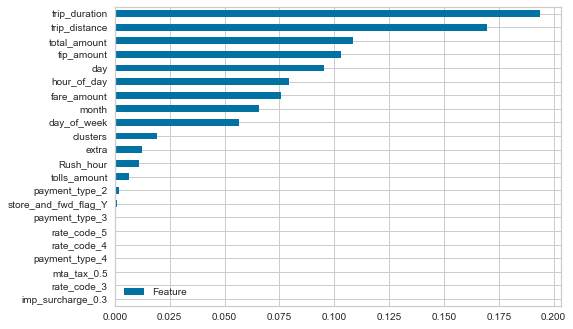

In [105]:
pd.DataFrame(rf.feature_importances_,index=dummytest.columns,columns=['Feature']).sort_values(by='Feature').plot(kind='barh')